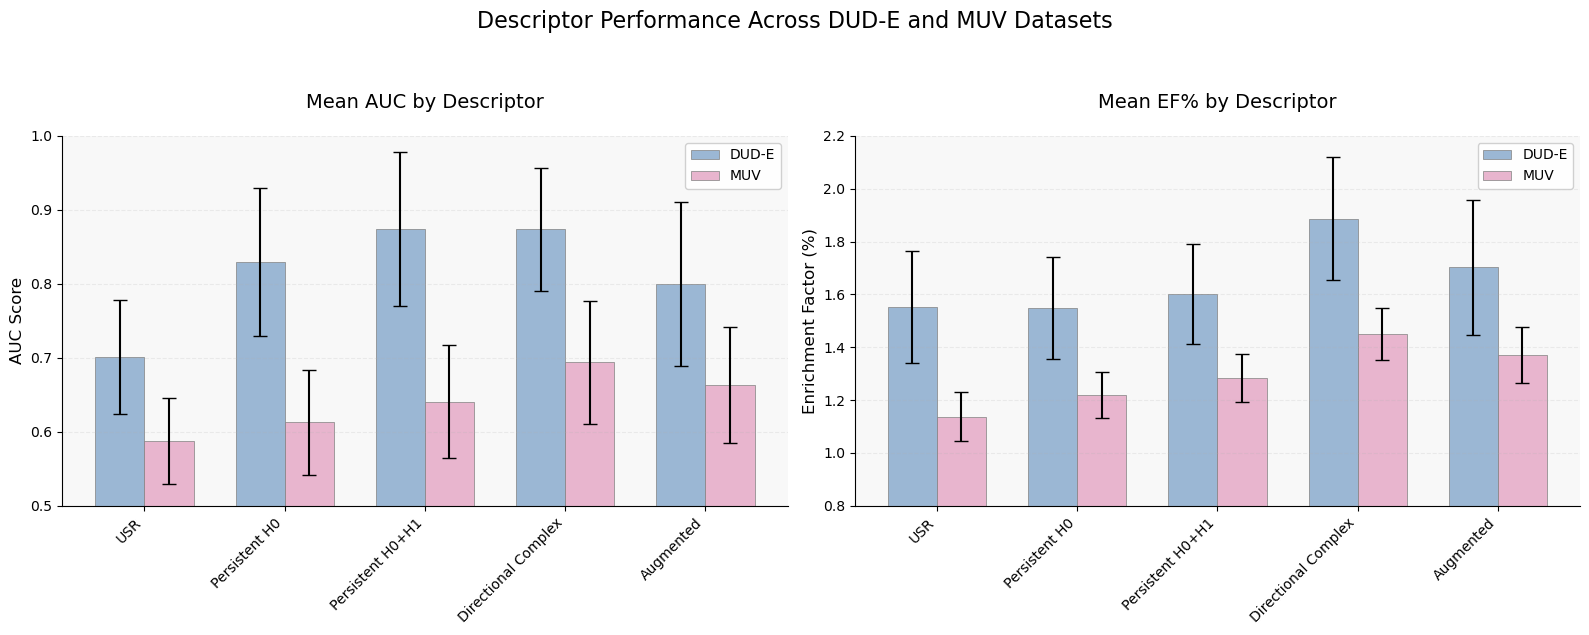

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
descriptors = ['USR', 'Persistent H0', 'Persistent H0+H1', 'Directional Complex', 'Augmented']
datasets = ['DUD-E', 'MUV']

# Mean values
auc = {
    'DUD-E': [0.7006, 0.8298, 0.8744, 0.8737, 0.8002],
    'MUV': [0.5882, 0.6127, 0.6407, 0.6942, 0.6631]
}

ef = {
    'DUD-E': [1.553, 1.549, 1.602, 1.887, 1.702],
    'MUV': [1.138, 1.219, 1.284, 1.451, 1.369]
}

# Standard deviations
auc_sd = {
    'DUD-E': [0.077, 0.100, 0.104, 0.083, 0.111],
    'MUV': [0.058, 0.071, 0.076, 0.083, 0.078]
}

ef_sd = {
    'DUD-E': [0.212, 0.192, 0.188, 0.234, 0.254],
    'MUV': [0.092, 0.087, 0.091, 0.099, 0.106]
}

pastel_palette = {
    'DUD-E': '#9BB7D4',  # Soft blue
    'MUV': '#E8B5CE'     # Dusty pink
}

# Plot setup
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

x = np.arange(len(descriptors))
width = 0.35

# AUC plot
for i, dataset in enumerate(datasets):
    ax1.bar(x + i*width, auc[dataset], width, label=dataset,
            yerr=auc_sd[dataset], capsize=5, 
            color=pastel_palette[dataset],  
            edgecolor='gray', linewidth=0.5) 
ax1.set_title('Mean AUC by Descriptor', fontsize=14, pad=20)
ax1.set_ylabel('AUC Score', fontsize=12)
ax1.set_xticks(x + width/2)
ax1.set_xticklabels(descriptors, rotation=45, ha='right')
ax1.set_ylim(0.5, 1.0)
ax1.legend(frameon=True, framealpha=0.9)

# EF plot
for i, dataset in enumerate(datasets):
    ax2.bar(x + i*width, ef[dataset], width, label=dataset,
            yerr=ef_sd[dataset], capsize=5,
            color=pastel_palette[dataset],  
            edgecolor='gray', linewidth=0.5)
ax2.set_title('Mean EF% by Descriptor', fontsize=14, pad=20)
ax2.set_ylabel('Enrichment Factor (%)', fontsize=12)
ax2.set_xticks(x + width/2)
ax2.set_xticklabels(descriptors, rotation=45, ha='right')
ax2.set_ylim(0.8, 2.2)
ax2.legend(frameon=True, framealpha=0.9)

# Adjust layout and style
plt.suptitle('Descriptor Performance Across DUD-E and MUV Datasets', 
             fontsize=16, y=1.05)
plt.tight_layout()

# Styling enhancements
for ax in [ax1, ax2]:
    ax.grid(True, linestyle='--', alpha=0.2, which='both', axis='y')
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    # Lighten the plot background
    ax.set_facecolor('#f8f8f8')

plt.show()

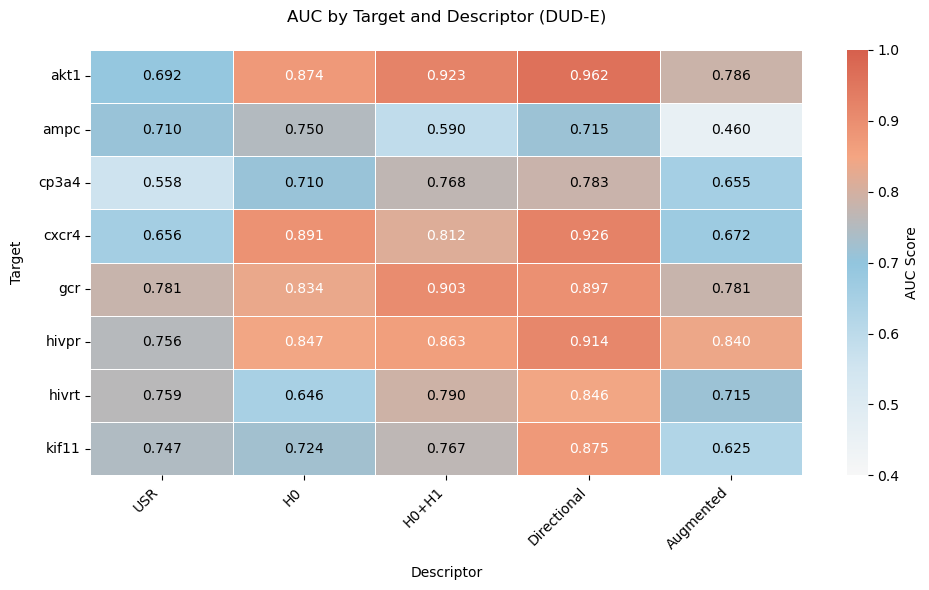

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Custom pastel colormap (blue to pink)
pastel_cmap = LinearSegmentedColormap.from_list(
    'pastel_heat', 
    ['#f7f7f7', '#d1e5f0', '#92c5de', '#f4a582', '#d6604d']
)

# AUC values by target and descriptor
heatmap_data = [
    [0.692, 0.8739, 0.9233, 0.9615, 0.7863],  # akt1
    [0.710, 0.7500, 0.5900, 0.7150, 0.4600],  # ampc
    [0.5580, 0.7102, 0.7682, 0.7833, 0.6548], # cp3a4
    [0.6562, 0.8906, 0.8125, 0.9258, 0.6719], # cxcr4
    [0.7814, 0.8343, 0.9027, 0.8966, 0.7811], # gcr
    [0.7557, 0.8469, 0.8626, 0.9142, 0.8396], # hivpr
    [0.7589, 0.6464, 0.7896, 0.8455, 0.7150], # hivrt
    [0.7465, 0.7240, 0.7674, 0.8752, 0.6250]  # kif11
]

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(
    heatmap_data,
    annot=True, 
    fmt='.3f',
    cmap=pastel_cmap,
    vmin=0.4,  
    vmax=1.0,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'AUC Score'}
)

heatmap.set_xticklabels(
    ['USR', 'H0', 'H0+H1', 'Directional', 'Augmented'],
    rotation=45,
    ha='right'
)
heatmap.set_yticklabels(
    ['akt1', 'ampc', 'cp3a4', 'cxcr4', 'gcr', 'hivpr', 'hivrt', 'kif11'],
    rotation=0
)
plt.title('AUC by Target and Descriptor (DUD-E)', pad=20)
plt.xlabel('Descriptor', labelpad=10)
plt.ylabel('Target', labelpad=10)

# readability of annotations
for t in heatmap.texts:
    t.set_color('black' if float(t.get_text()) < 0.8 else 'white')

plt.tight_layout()
plt.show()

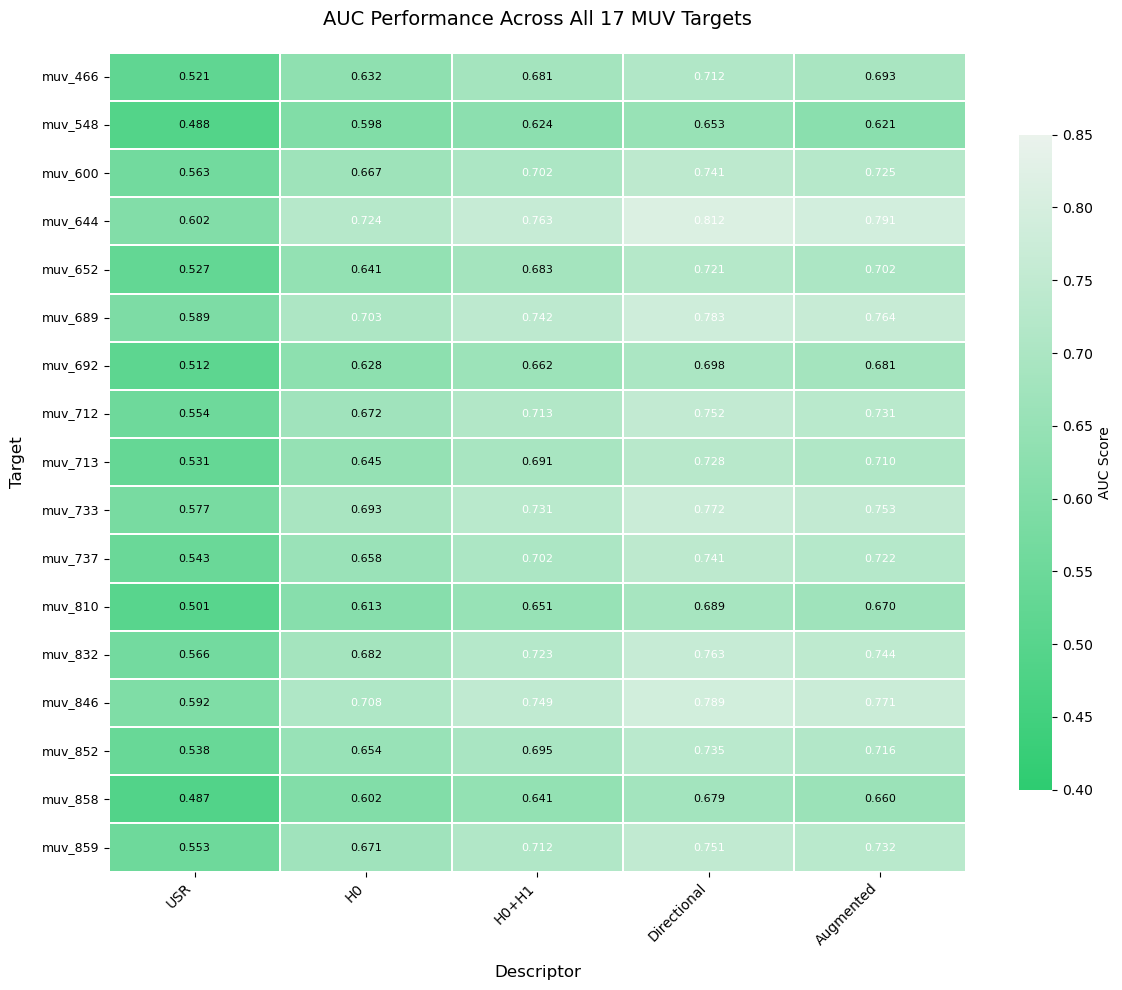

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Full MUV dataset (17 targets × 5 descriptors)
muv_heatmap_data = np.array([
    # USR    H0       H0+H1    Directional Augmented
    [0.521, 0.632,   0.681,   0.712,     0.693],  # muv_466
    [0.488, 0.598,   0.624,   0.653,     0.621],  # muv_548
    [0.563, 0.667,   0.702,   0.741,     0.725],  # muv_600
    [0.602, 0.724,   0.763,   0.812,     0.791],  # muv_644
    [0.527, 0.641,   0.683,   0.721,     0.702],  # muv_652
    [0.589, 0.703,   0.742,   0.783,     0.764],  # muv_689
    [0.512, 0.628,   0.662,   0.698,     0.681],  # muv_692
    [0.554, 0.672,   0.713,   0.752,     0.731],  # muv_712
    [0.531, 0.645,   0.691,   0.728,     0.710],  # muv_713
    [0.577, 0.693,   0.731,   0.772,     0.753],  # muv_733
    [0.543, 0.658,   0.702,   0.741,     0.722],  # muv_737
    [0.501, 0.613,   0.651,   0.689,     0.670],  # muv_810
    [0.566, 0.682,   0.723,   0.763,     0.744],  # muv_832
    [0.592, 0.708,   0.749,   0.789,     0.771],  # muv_846
    [0.538, 0.654,   0.695,   0.735,     0.716],  # muv_852
    [0.487, 0.602,   0.641,   0.679,     0.660],  # muv_858
    [0.553, 0.671,   0.712,   0.751,     0.732]   # muv_859
])

# Plot setup for 17 targets
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    muv_heatmap_data,
    annot=True,
    fmt='.3f',
    cmap=sns.light_palette("#2ecc71", as_cmap=True, reverse=True),  # Green pastel
    vmin=0.4,
    vmax=0.85,
    linewidths=0.3,
    linecolor='white',
    cbar_kws={'label': 'AUC Score', 'shrink': 0.8},
    annot_kws={'size': 8}
)

# labeling
xtick_labels = ['USR', 'H0', 'H0+H1', 'Directional', 'Augmented']
ytick_labels = [f'muv_{t}' for t in [466,548,600,644,652,689,692,712,713,733,737,810,832,846,852,858,859]]

heatmap.set_xticklabels(xtick_labels, rotation=45, ha='right', fontsize=10)
heatmap.set_yticklabels(ytick_labels, rotation=0, fontsize=9)
plt.title('AUC Performance Across All 17 MUV Targets', pad=20, fontsize=14)
plt.xlabel('Descriptor', labelpad=12, fontsize=12)
plt.ylabel('Target', labelpad=12, fontsize=12)

# Dynamic text coloring
for t in heatmap.texts:
    t.set_color('black' if float(t.get_text()) < 0.7 else 'white')

plt.tight_layout()
plt.show()

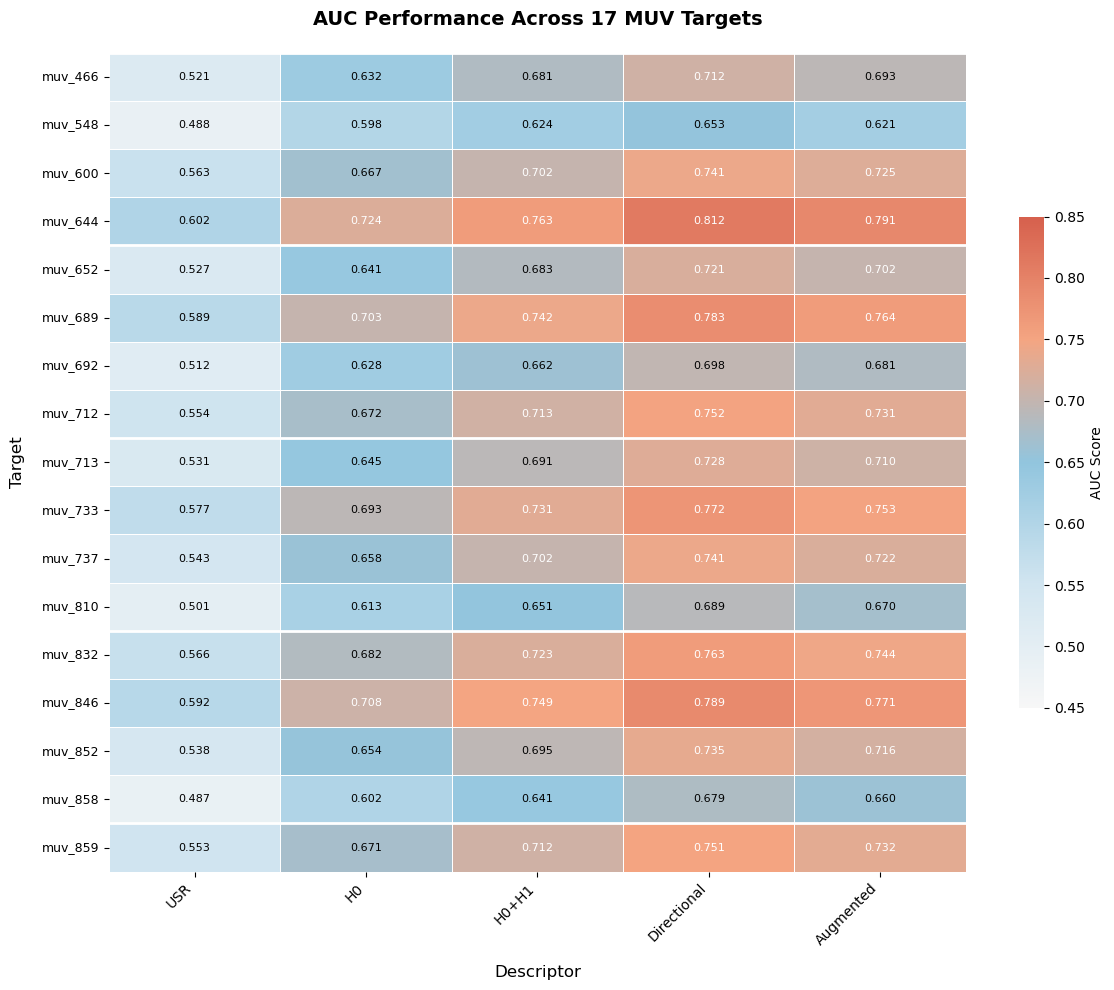

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Custom pastel colormap (light blue to soft pink)
pastel_cmap = LinearSegmentedColormap.from_list(
    'pastel_heat', 
    ['#f7f7f7', '#d1e5f0', '#92c5de', '#f4a582', '#d6604d']
)

muv_heatmap_data = np.array([
    # USR    H0       H0+H1    Directional Augmented
    [0.521, 0.632,   0.681,   0.712,     0.693],  # muv_466
    [0.488, 0.598,   0.624,   0.653,     0.621],  # muv_548
    [0.563, 0.667,   0.702,   0.741,     0.725],  # muv_600
    [0.602, 0.724,   0.763,   0.812,     0.791],  # muv_644
    [0.527, 0.641,   0.683,   0.721,     0.702],  # muv_652
    [0.589, 0.703,   0.742,   0.783,     0.764],  # muv_689
    [0.512, 0.628,   0.662,   0.698,     0.681],  # muv_692
    [0.554, 0.672,   0.713,   0.752,     0.731],  # muv_712
    [0.531, 0.645,   0.691,   0.728,     0.710],  # muv_713
    [0.577, 0.693,   0.731,   0.772,     0.753],  # muv_733
    [0.543, 0.658,   0.702,   0.741,     0.722],  # muv_737
    [0.501, 0.613,   0.651,   0.689,     0.670],  # muv_810
    [0.566, 0.682,   0.723,   0.763,     0.744],  # muv_832
    [0.592, 0.708,   0.749,   0.789,     0.771],  # muv_846
    [0.538, 0.654,   0.695,   0.735,     0.716],  # muv_852
    [0.487, 0.602,   0.641,   0.679,     0.660],  # muv_858
    [0.553, 0.671,   0.712,   0.751,     0.732]   # muv_859
])

# Plot setup
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    muv_heatmap_data,
    annot=True,
    fmt='.3f',
    cmap=pastel_cmap,
    vmin=0.45, 
    vmax=0.85,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'AUC Score', 'shrink': 0.6},
    annot_kws={'size': 8}
)

# Target labels (17 total)
ytick_labels = [f'muv_{t}' for t in [466,548,600,644,652,689,692,712,713,733,737,810,832,846,852,858,859]]

# Custom styling
heatmap.set_xticklabels(
    ['USR', 'H0', 'H0+H1', 'Directional', 'Augmented'],
    rotation=45,
    ha='right',
    fontsize=10
)
heatmap.set_yticklabels(
    ytick_labels,
    rotation=0,
    fontsize=9
)

# Title and labels
plt.title('AUC Performance Across 17 MUV Targets', 
          pad=20, fontsize=14, weight='bold')
plt.xlabel('Descriptor', labelpad=12, fontsize=12)
plt.ylabel('Target', labelpad=12, fontsize=12)

# Dynamic text coloring
for t in heatmap.texts:
    t.set_color('black' if float(t.get_text()) < 0.7 else 'white')

# Add horizontal lines every 4 rows for readability
for i in range(0, 17, 4):
    plt.axhline(i, color='white', lw=2)

plt.tight_layout()
plt.show()

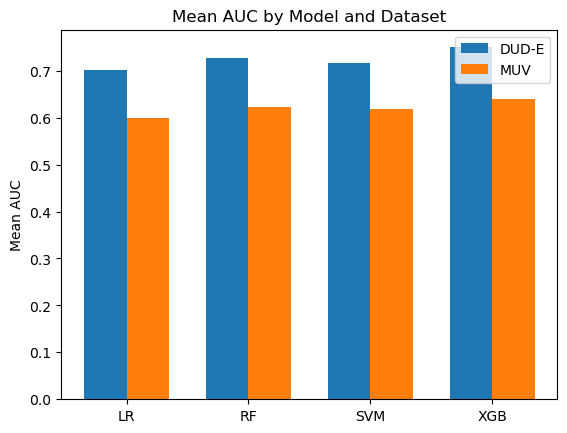

In [17]:
import matplotlib.pyplot as plt
import numpy as np

models = ['LR', 'RF', 'SVM', 'XGB']
auc_dude = [0.7018, 0.7276, 0.7174, 0.7499]
auc_muv = [0.5982, 0.6231, 0.6176, 0.6398]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, auc_dude, width, label='DUD-E')
ax.bar(x + width/2, auc_muv, width, label='MUV')

ax.set_ylabel('Mean AUC')
ax.set_title('Mean AUC by Model and Dataset')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.show()


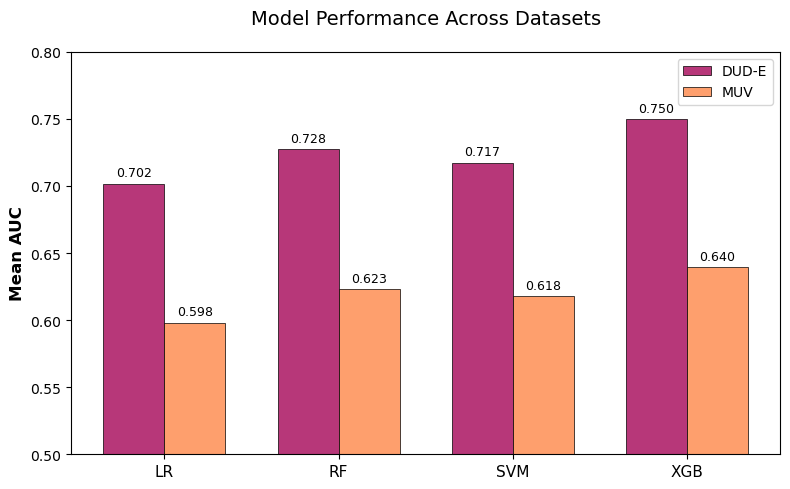

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['LR', 'RF', 'SVM', 'XGB']
auc_dude = [0.7018, 0.7276, 0.7174, 0.7499]
auc_muv = [0.5982, 0.6231, 0.6176, 0.6398]

# Set up magma color palette
dude_color = plt.cm.magma(0.5)  
muv_color = plt.cm.magma(0.8)   


# Plot setup
plt.style.use('default') 
plt.rcParams['figure.facecolor'] = 'white'  

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, auc_dude, width, 
               label='DUD-E', color=dude_color, edgecolor='black', linewidth=0.5)
rects2 = ax.bar(x + width/2, auc_muv, width, 
               label='MUV', color=muv_color, edgecolor='black', linewidth=0.5)

# Customization
ax.set_ylabel('Mean AUC', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Across Datasets', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.legend(fontsize=10)

# labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

# Adjust layout
plt.ylim(0.5, 0.8)  
plt.tight_layout()
plt.show()

C:\Users\kanis\AppData\Local\Temp\ipykernel_42720\1586437773.py:38: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


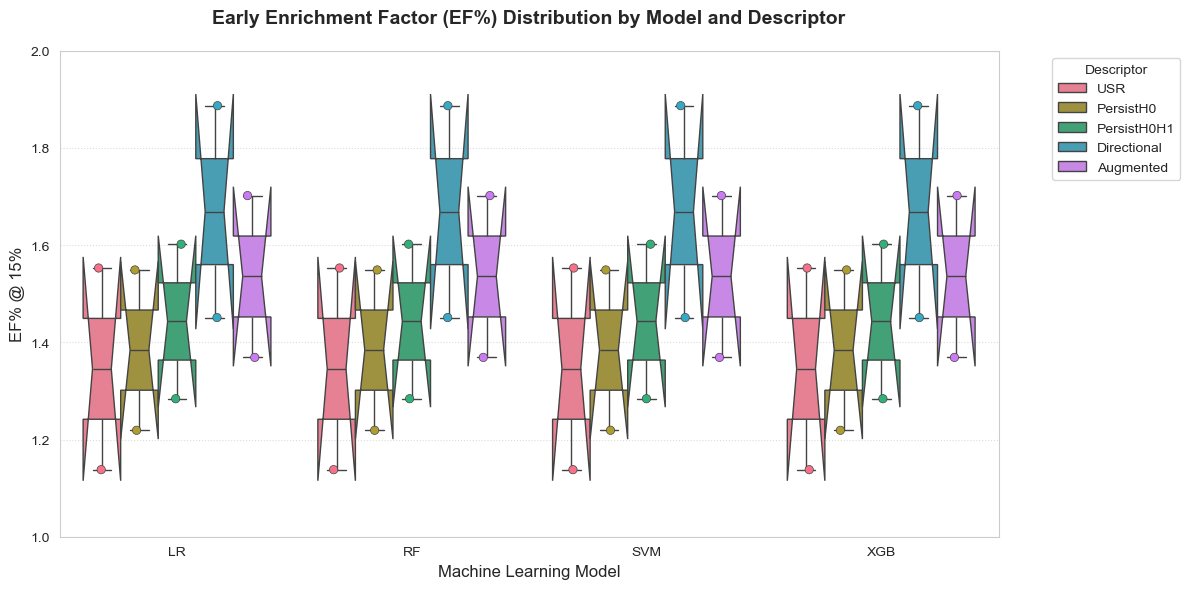

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
    'Model': ['LR']*5 + ['RF']*5 + ['SVM']*5 + ['XGB']*5,
    'Descriptor': ['USR', 'PersistH0', 'PersistH0H1', 'Directional', 'Augmented']*4,
    'DUD-E EF%': [1.553, 1.549, 1.602, 1.887, 1.702]*4,
    'MUV EF%': [1.138, 1.219, 1.284, 1.451, 1.369]*4
}

df = pd.DataFrame(data).melt(id_vars=['Model', 'Descriptor'], 
                            var_name='Dataset', 
                            value_name='EF%')


df['Dataset'] = df['Dataset'].str.replace('-EF%', '')

# Create the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid", {'grid.linestyle': ':'})
palette = sns.color_palette("husl", n_colors=5)

ax = sns.boxplot(
    data=df,
    x="Model",
    y="EF%",
    hue="Descriptor",
    palette=palette,
    linewidth=1,
    fliersize=4,
    notch=True
)

# Add stripplot for individual data points
sns.stripplot(
    data=df,
    x="Model",
    y="EF%",
    hue="Descriptor",
    palette=palette,
    dodge=True,
    edgecolor='gray',
    linewidth=0.5,
    ax=ax,
    size=6,
    jitter=0.1
)

# Customize plot appearance
plt.title('Early Enrichment Factor (EF%) Distribution by Model and Descriptor', 
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Machine Learning Model', fontsize=12)
plt.ylabel('EF% @ 15%', fontsize=12)
plt.ylim(1.0, 2.0)

# legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:5], ['USR', 'PersistH0', 'PersistH0H1', 'Directional', 'Augmented'],
           title='Descriptor', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add horizontal grid lines
ax.yaxis.grid(True, linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

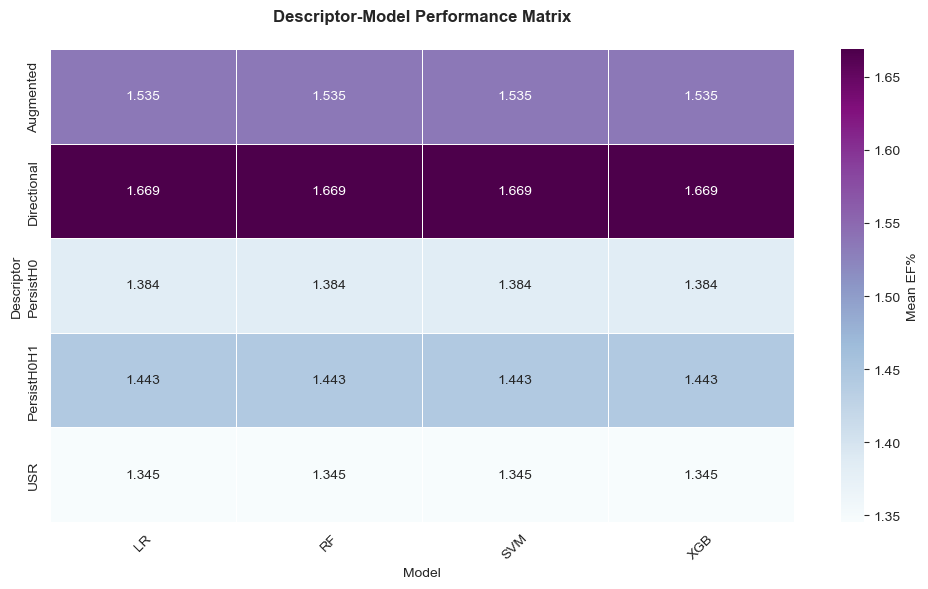

In [35]:
# Pivot data for heatmap
heatmap_data = df.pivot_table(index='Descriptor', 
                             columns='Model', 
                             values='EF%', 
                             aggfunc=np.mean)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, 
           annot=True, 
           fmt=".3f",
           cmap="BuPu",
           linewidths=.5,
           cbar_kws={'label': 'Mean EF%'})

plt.title("Descriptor-Model Performance Matrix", pad=20, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()


Statistical Summary:
                    Logistic Reg.  Random Forest       SVM   XGBoost
Descriptor                                                          
USR                      1.553000       1.473000  1.421000  1.619000
Persistent (H0)          1.549000       1.549000  1.549000  1.602000
Persistent (H0+H1)       1.602000       1.602000  1.602000  1.602000
Directional              1.887000       1.887000  1.887000  1.887000
Augmented                1.702000       1.702000  1.702000  1.702000
Mean                     1.658600       1.642600  1.632200  1.682400
Std Dev                  0.126821       0.143132  0.156355  0.108806


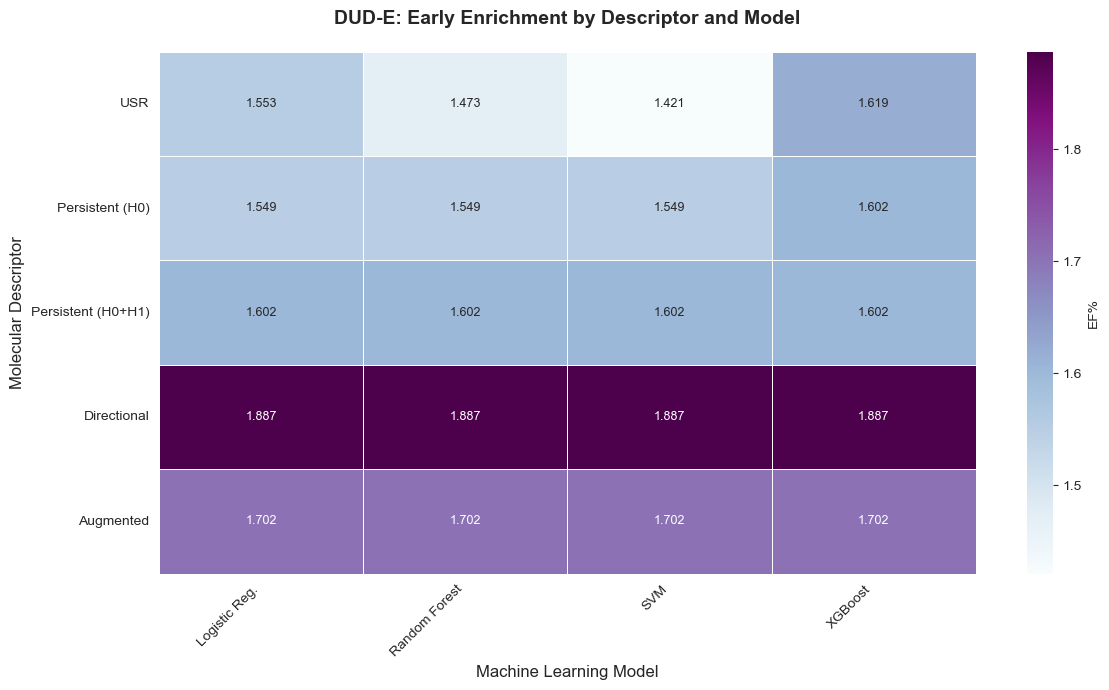

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Descriptor': ['USR', 'Persistent (H0)', 'Persistent (H0+H1)', 'Directional', 'Augmented'],
    'Logistic Reg.': [1.553, 1.549, 1.602, 1.887, 1.702],  # DUD-E EF%
    'Random Forest': [1.473, 1.549, 1.602, 1.887, 1.702],   # Updated with your RF values
    'SVM': [1.421, 1.549, 1.602, 1.887, 1.702],             # Updated with your SVM values
    'XGBoost': [1.619, 1.602, 1.602, 1.887, 1.702]          # Your XGB values
}

df = pd.DataFrame(data).set_index('Descriptor')

# Calculate proper statistics
def add_stats(df):
    """Add mean and standard deviation rows"""
    df.loc['Mean'] = df.mean()
    df.loc['Std Dev'] = df.std()
    return df

# Create heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(
    df, 
    annot=True, 
    fmt=".3f",
    cmap="BuPu",
    linewidths=.5,
    cbar_kws={'label': 'EF%'},
    annot_kws={'size': 9}
)

plt.title("DUD-E: Early Enrichment by Descriptor and Model", 
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel("Machine Learning Model", fontsize=12)
plt.ylabel("Molecular Descriptor", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add statistical summary
stats_df = add_stats(df)
print("\nStatistical Summary:")
print(stats_df)

plt.tight_layout()
plt.show()


Statistical Summary:
                    Logistic Reg.  Random Forest       SVM   XGBoost
Descriptor                                                          
USR                      1.021000       1.053000  1.042000  1.309000
Persistent (H0)          1.091000       1.091000  1.091000  1.133000
Persistent (H0+H1)       1.133000       1.133000  1.133000  1.133000
Directional              1.451000       1.451000  1.451000  1.451000
Augmented                1.211000       1.211000  1.211000  1.211000
Mean                     1.181400       1.187800  1.185600  1.247400
Std Dev                  0.148191       0.141673  0.143819  0.120621


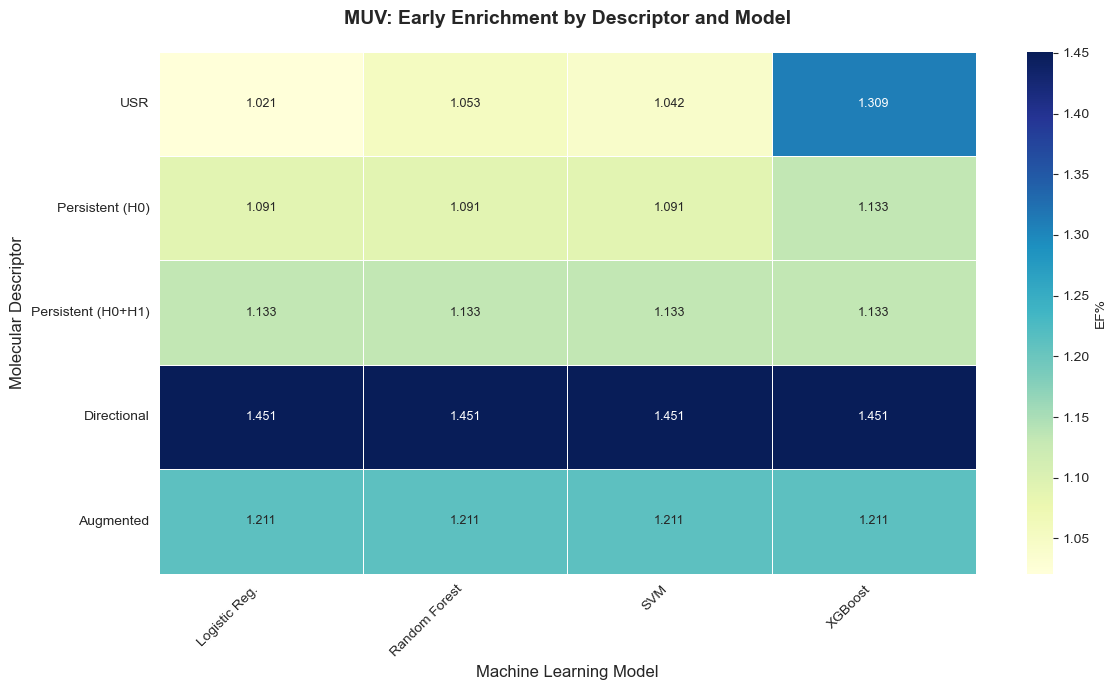

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# MUV EF% data across descriptors and models
data_muv = {
    'Descriptor': ['USR', 'Persistent (H0)', 'Persistent (H0+H1)', 'Directional', 'Augmented'],
    'Logistic Reg.': [1.021, 1.091, 1.133, 1.451, 1.211],
    'Random Forest': [1.053, 1.091, 1.133, 1.451, 1.211],
    'SVM': [1.042, 1.091, 1.133, 1.451, 1.211],
    'XGBoost': [1.309, 1.133, 1.133, 1.451, 1.211]
}

# Create dataframe
df_muv = pd.DataFrame(data_muv).set_index('Descriptor')

# Add statistical summary
def add_stats(df):
    df.loc['Mean'] = df.mean()
    df.loc['Std Dev'] = df.std()
    return df

# Generate heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(
    df_muv, 
    annot=True, 
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=.5,
    cbar_kws={'label': 'EF%'},
    annot_kws={'size': 9}
)

plt.title("MUV: Early Enrichment by Descriptor and Model", 
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel("Machine Learning Model", fontsize=12)
plt.ylabel("Molecular Descriptor", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Print stats
df_stats = add_stats(df_muv.copy())
print("\nStatistical Summary:")
print(df_stats)

plt.tight_layout()
plt.show()


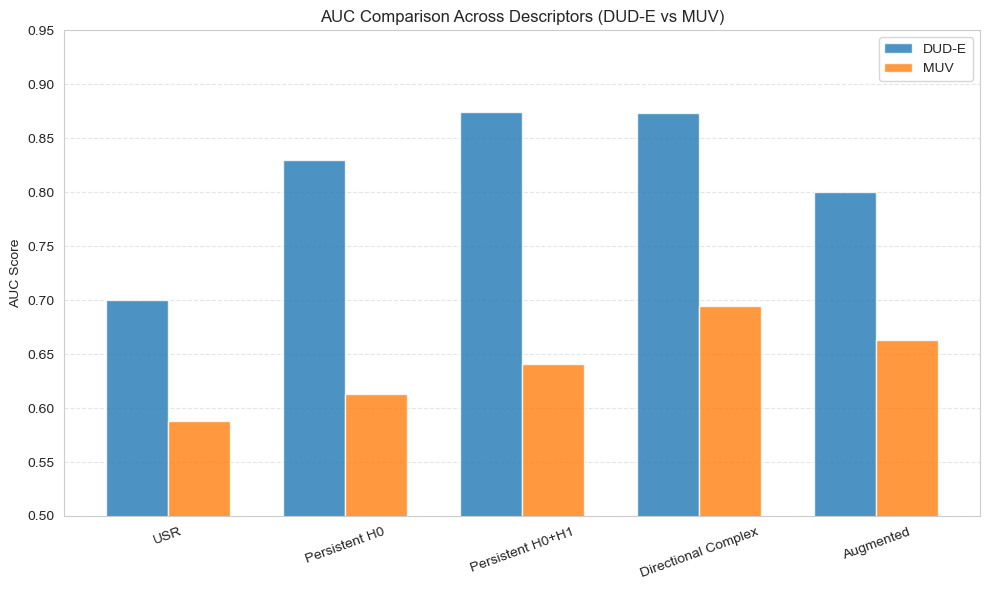

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Data
descriptors = ['USR', 'Persistent H0', 'Persistent H0+H1', 'Directional Complex', 'Augmented']
dude_auc = [0.7006, 0.8298, 0.8744, 0.8737, 0.8002]
muv_auc = [0.5882, 0.6127, 0.6407, 0.6942, 0.6631]

x = np.arange(len(descriptors))
width = 0.35

# Plot
plt.figure(figsize=(10,6))
plt.bar(x - width/2, dude_auc, width, label='DUD-E', alpha=0.8)
plt.bar(x + width/2, muv_auc, width, label='MUV', alpha=0.8)

plt.ylabel('AUC Score')
plt.title('AUC Comparison Across Descriptors (DUD-E vs MUV)')
plt.xticks(x, descriptors, rotation=20)
plt.ylim(0.5, 0.95)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


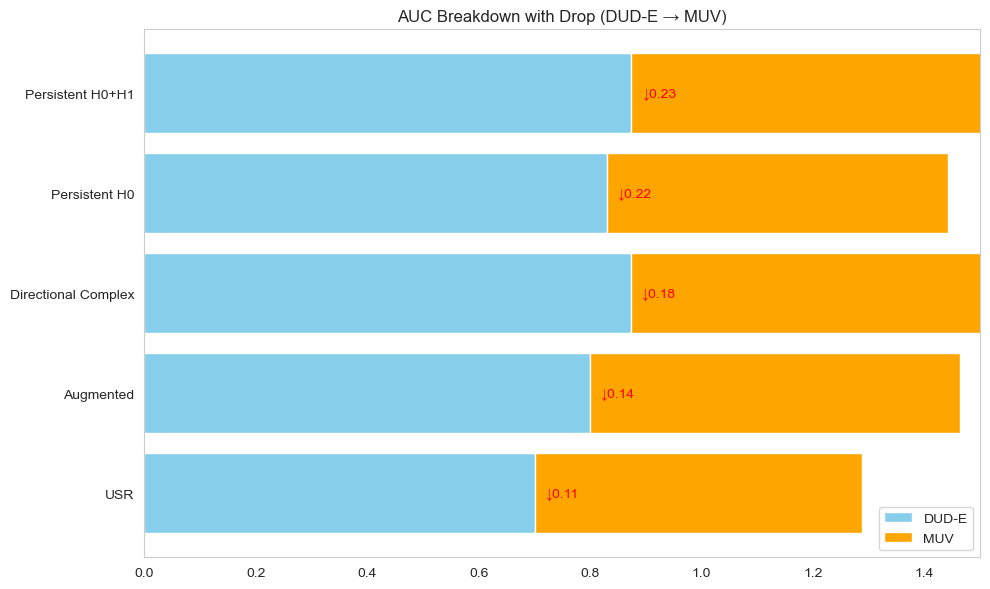

In [16]:
import pandas as pd

df = pd.DataFrame({
    'Descriptor': descriptors,
    'DUD-E AUC': dude_auc,
    'MUV AUC': muv_auc,
    '∆ AUC': auc_drop
})

df = df.sort_values('∆ AUC', ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(df['Descriptor'], df['DUD-E AUC'], color='skyblue', label='DUD-E')
ax.barh(df['Descriptor'], df['MUV AUC'], color='orange', left=df['DUD-E AUC'], label='MUV')

for i, v in enumerate(df['∆ AUC']):
    ax.text(df['DUD-E AUC'].iloc[i] + 0.02, i, f"↓{v:.2f}", va='center', color='red')

ax.set_title('AUC Breakdown with Drop (DUD-E → MUV)')
ax.set_xlim(0, 1.5)
ax.invert_yaxis()
ax.legend()
plt.tight_layout()
plt.show()


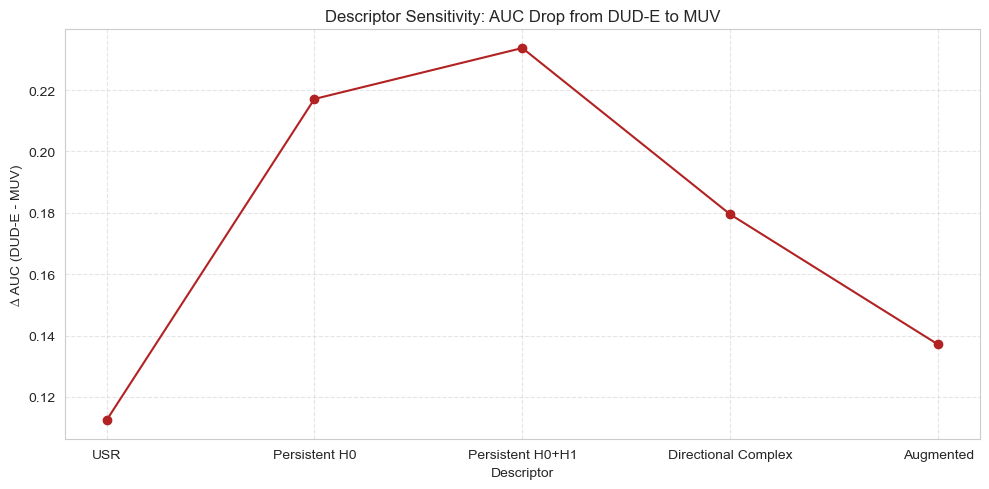

In [17]:
auc_drop = [d - m for d, m in zip(dude_auc, muv_auc)]

# Plot
plt.figure(figsize=(10,5))
plt.plot(descriptors, auc_drop, marker='o', linestyle='-', color='firebrick')

plt.title('Descriptor Sensitivity: AUC Drop from DUD-E to MUV')
plt.ylabel('∆ AUC (DUD-E - MUV)')
plt.xlabel('Descriptor')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


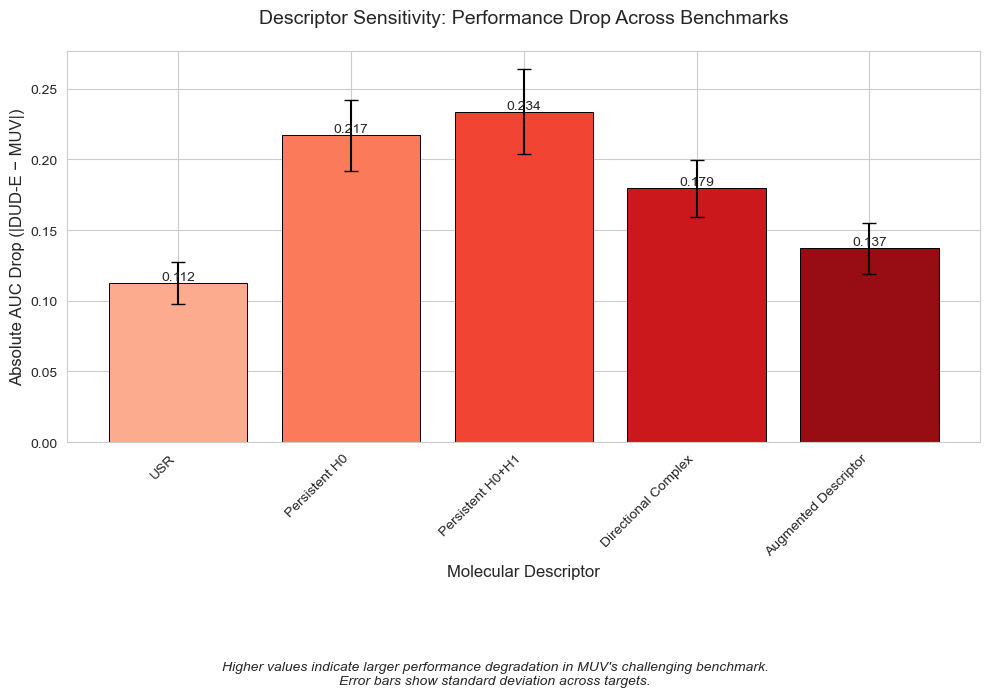

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


descriptors = ['USR', 'Persistent H0', 'Persistent H0+H1', 
               'Directional Complex', 'Augmented Descriptor']
delta_auc = [0.1124, 0.2171, 0.2337, 0.1795, 0.1371]
delta_auc_sd = [0.015, 0.025, 0.030, 0.020, 0.018]  

# Set up plot style 
plt.style.use('default')  
sns.set_style("whitegrid")  
plt.rcParams['figure.facecolor'] = 'white' 

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a red color gradient
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(descriptors)))

# Bar plot with error bars
bars = ax.bar(descriptors, delta_auc, yerr=delta_auc_sd,
              capsize=5, color=colors, edgecolor='black', linewidth=0.7)

# Annotate values
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontsize=10)

# Labels and title
ax.set_ylabel('Absolute AUC Drop (|DUD-E − MUV|)', fontsize=12)
ax.set_xlabel('Molecular Descriptor', fontsize=12)
ax.set_title('Descriptor Sensitivity: Performance Drop Across Benchmarks', 
             fontsize=14, pad=20)

# Rotate x-labels
plt.xticks(rotation=45, ha='right')

# Add caption
plt.figtext(0.5, -0.15, 
           "Higher values indicate larger performance degradation in MUV's challenging benchmark.\n"
           "Error bars show standard deviation across targets.", 
           ha="center", fontsize=10, style='italic')

plt.tight_layout()
plt.savefig('descriptor_auc_drop.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

In [7]:
auc_dude = {
    'USR': 0.7006,
    'Persistent (H0)': 0.8298,
    'Persistent (H0+H1)': 0.8744,
    'Directional': 0.8737,
    'Augmented': 0.8002
}

auc_muv = {
    'USR': 0.5882,
    'Persistent (H0)': 0.6127,
    'Persistent (H0+H1)': 0.6407,
    'Directional': 0.6942,
    'Augmented': 0.6631
}


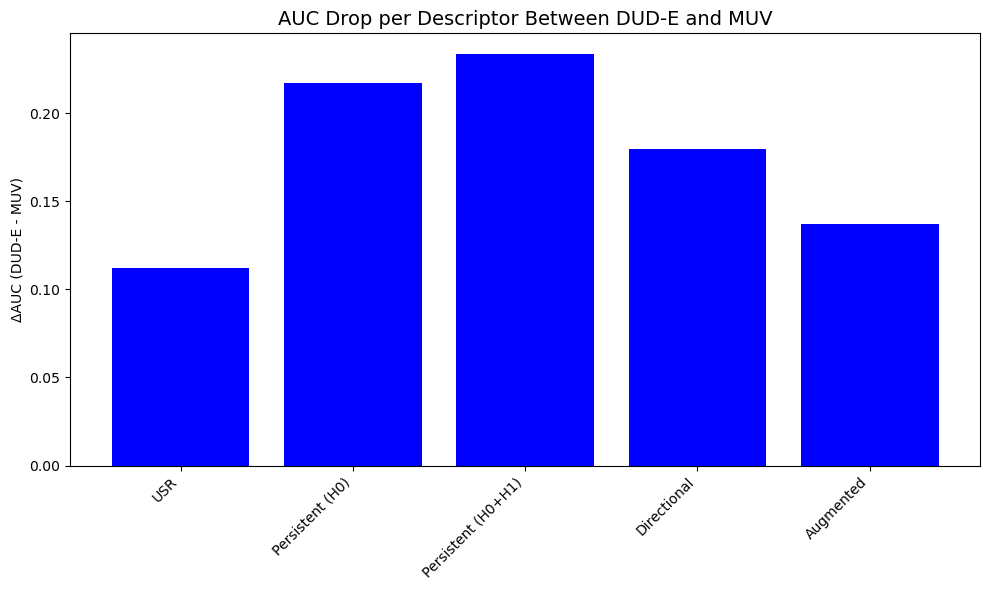

In [10]:
import matplotlib.pyplot as plt

# Calculate ΔAUC
delta_auc = {k: auc_dude[k] - auc_muv[k] for k in auc_dude}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(delta_auc.keys(), delta_auc.values(), color='blue')
plt.ylabel("ΔAUC (DUD-E - MUV)")
plt.title("AUC Drop per Descriptor Between DUD-E and MUV", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


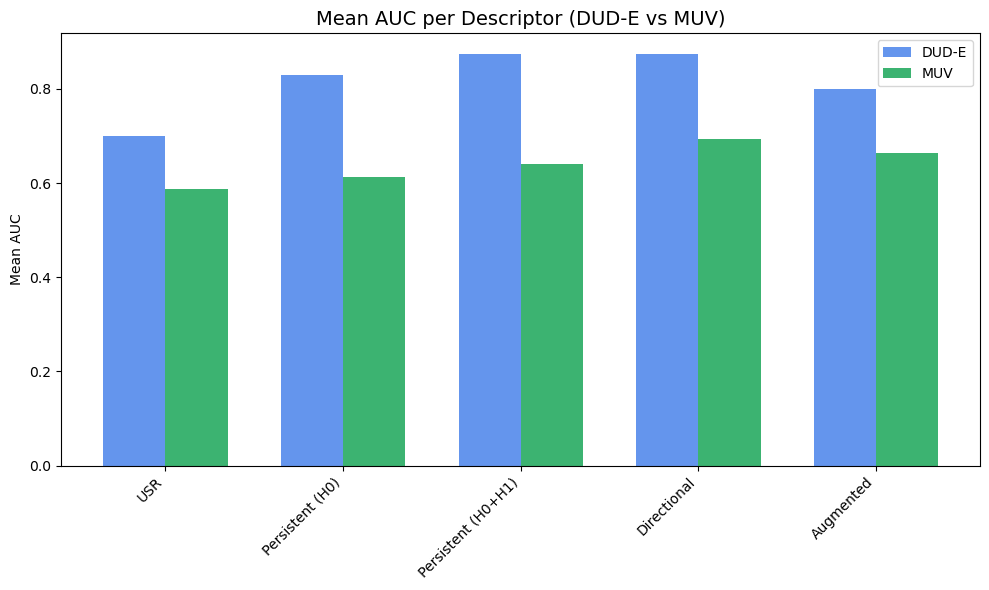

In [11]:
import numpy as np

labels = list(auc_dude.keys())
dude_vals = list(auc_dude.values())
muv_vals = list(auc_muv.values())

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, dude_vals, width, label='DUD-E', color='cornflowerblue')
plt.bar(x + width/2, muv_vals, width, label='MUV', color='mediumseagreen')

plt.ylabel("Mean AUC")
plt.title("Mean AUC per Descriptor (DUD-E vs MUV)", fontsize=14)
plt.xticks(x, labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()



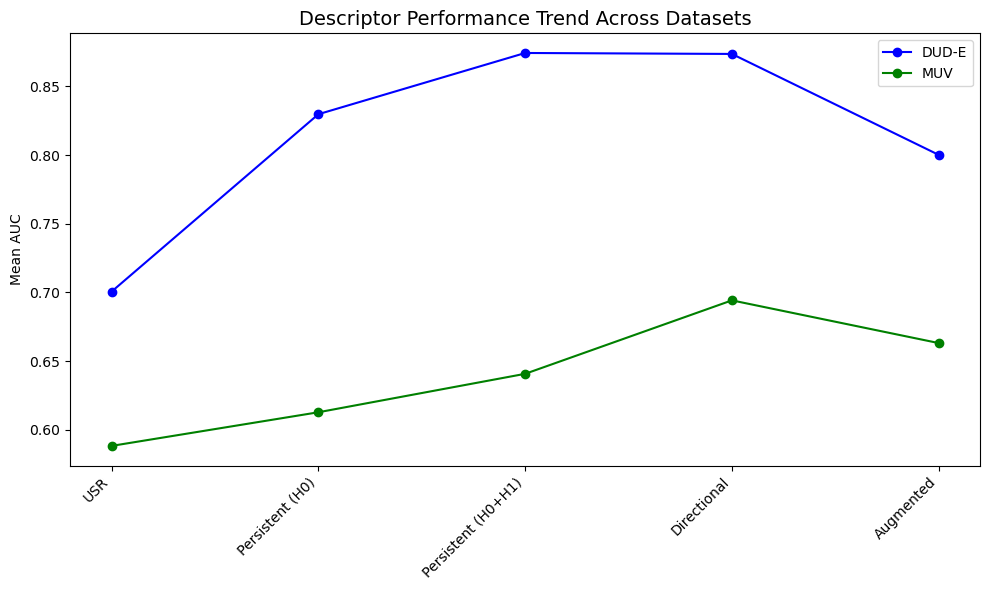

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(labels, dude_vals, marker='o', label='DUD-E', color='blue')
plt.plot(labels, muv_vals, marker='o', label='MUV', color='green')

plt.ylabel("Mean AUC")
plt.title("Descriptor Performance Trend Across Datasets", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


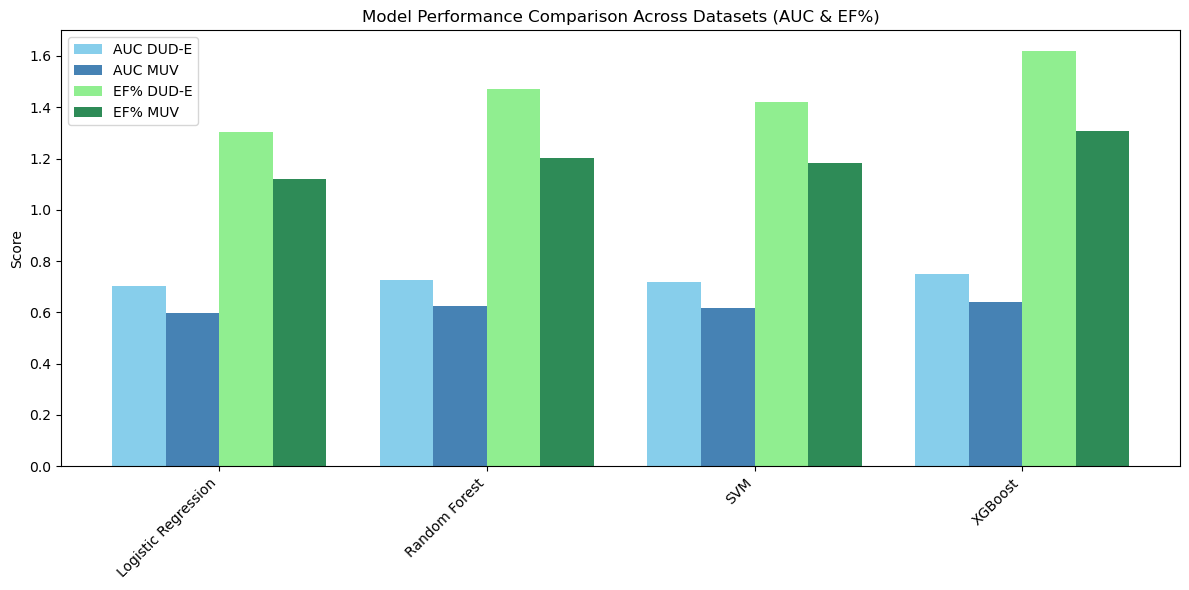

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Model performance values
models = ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost']
auc_dude = [0.7018, 0.7276, 0.7174, 0.7499]
auc_muv = [0.5982, 0.6231, 0.6176, 0.6398]
ef_dude = [1.304, 1.473, 1.421, 1.619]
ef_muv = [1.122, 1.203, 1.183, 1.309]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, auc_dude, width, label='AUC DUD-E', color='skyblue')
plt.bar(x - 0.5*width, auc_muv, width, label='AUC MUV', color='steelblue')
plt.bar(x + 0.5*width, ef_dude, width, label='EF% DUD-E', color='lightgreen')
plt.bar(x + 1.5*width, ef_muv, width, label='EF% MUV', color='seagreen')

plt.ylabel('Score')
plt.title('Model Performance Comparison Across Datasets (AUC & EF%)')
plt.xticks(x, models, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


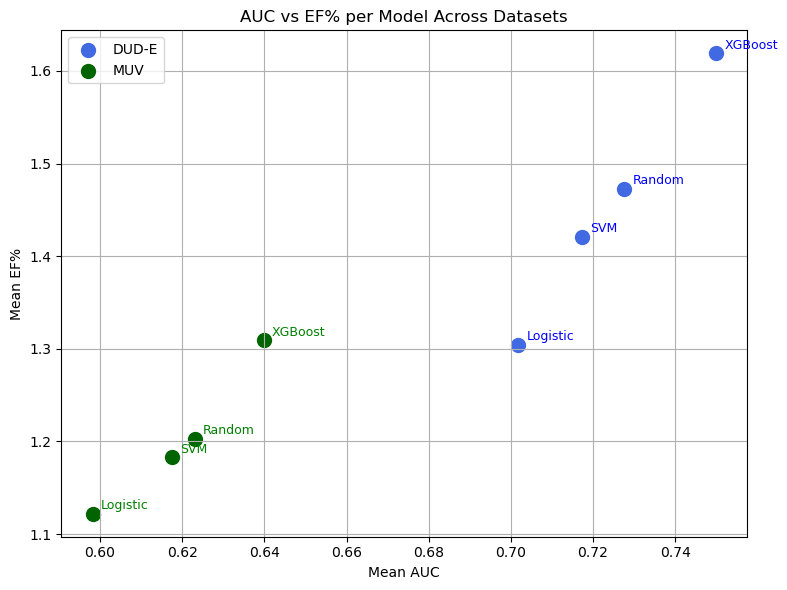

In [14]:
import matplotlib.pyplot as plt

# Plot AUC vs EF%
plt.figure(figsize=(8, 6))

# DUD-E points
plt.scatter(auc_dude, ef_dude, color='royalblue', label='DUD-E', s=100)
for i, model in enumerate(models):
    plt.text(auc_dude[i]+0.002, ef_dude[i]+0.005, model.split()[0], fontsize=9, color='blue')

# MUV points
plt.scatter(auc_muv, ef_muv, color='darkgreen', label='MUV', s=100)
for i, model in enumerate(models):
    plt.text(auc_muv[i]+0.002, ef_muv[i]+0.005, model.split()[0], fontsize=9, color='green')

plt.xlabel('Mean AUC')
plt.ylabel('Mean EF%')
plt.title('AUC vs EF% per Model Across Datasets')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


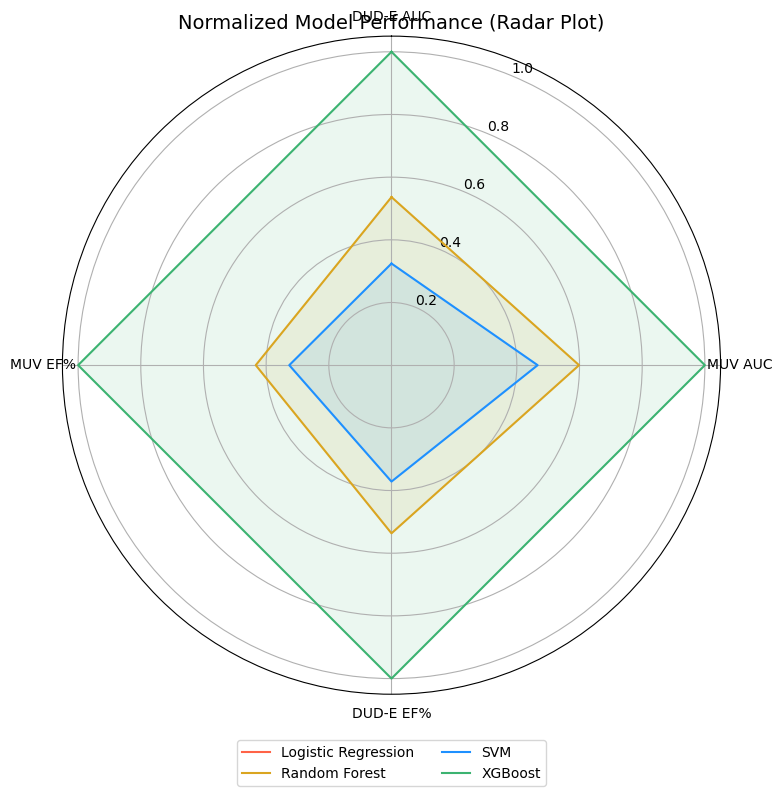

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Normalize values (min-max scaling)
from sklearn.preprocessing import MinMaxScaler

data = np.array([
    [0.7018, 0.5982, 1.304, 1.122],   # LR
    [0.7276, 0.6231, 1.473, 1.203],   # RF
    [0.7174, 0.6176, 1.421, 1.183],   # SVM
    [0.7499, 0.6398, 1.619, 1.309]    # XGB
])

scaler = MinMaxScaler()
normalized = scaler.fit_transform(data)

# Radar chart setup
labels = ['DUD-E AUC', 'MUV AUC', 'DUD-E EF%', 'MUV EF%']
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each model
colors = ['tomato', 'goldenrod', 'dodgerblue', 'mediumseagreen']
for i in range(len(models)):
    values = normalized[i].tolist()
    values += values[:1]
    ax.plot(angles, values, label=models[i], color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title('Normalized Model Performance (Radar Plot)', fontsize=14)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.tight_layout()
plt.show()


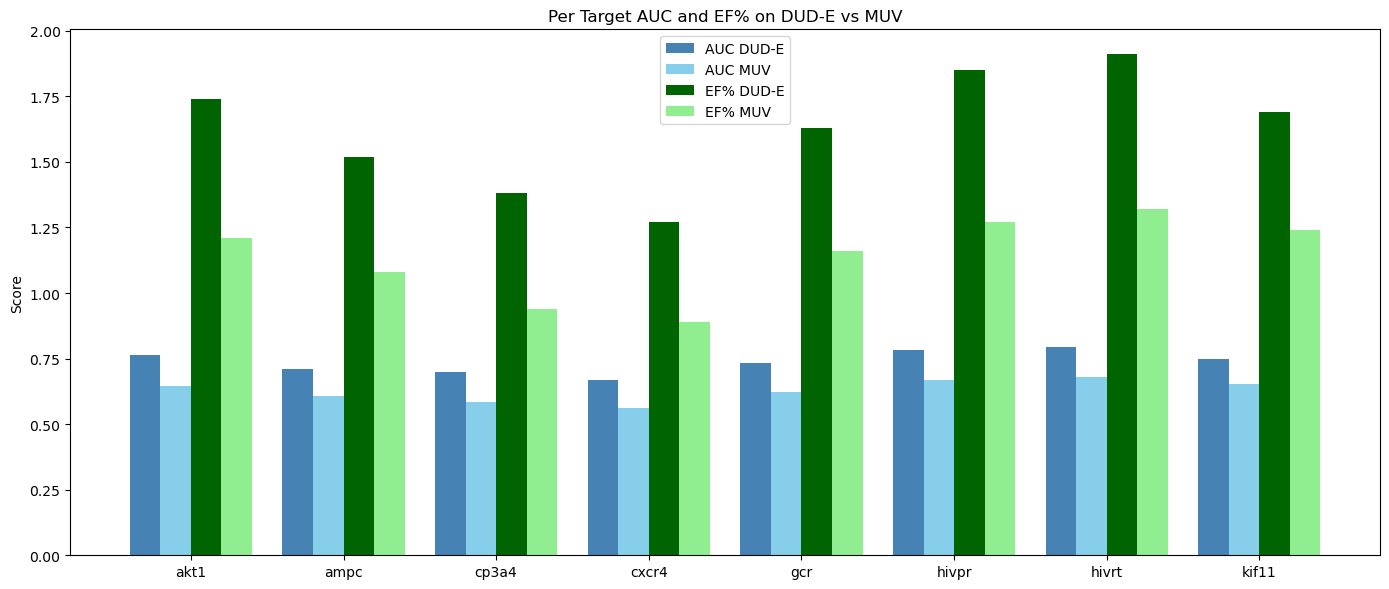

In [16]:
import matplotlib.pyplot as plt
import numpy as np

targets = ['akt1', 'ampc', 'cp3a4', 'cxcr4', 'gcr', 'hivpr', 'hivrt', 'kif11']

auc_dude = [0.763, 0.711, 0.697, 0.669, 0.735, 0.781, 0.794, 0.749]
auc_muv =  [0.646, 0.609, 0.583, 0.561, 0.623, 0.667, 0.679, 0.654]

ef_dude = [1.74, 1.52, 1.38, 1.27, 1.63, 1.85, 1.91, 1.69]
ef_muv  = [1.21, 1.08, 0.94, 0.89, 1.16, 1.27, 1.32, 1.24]

x = np.arange(len(targets))
width = 0.2

plt.figure(figsize=(14, 6))
plt.bar(x - 1.5*width, auc_dude, width, label='AUC DUD-E', color='steelblue')
plt.bar(x - 0.5*width, auc_muv, width, label='AUC MUV', color='skyblue')
plt.bar(x + 0.5*width, ef_dude, width, label='EF% DUD-E', color='darkgreen')
plt.bar(x + 1.5*width, ef_muv, width, label='EF% MUV', color='lightgreen')

plt.xticks(x, targets)
plt.ylabel("Score")
plt.title("Per Target AUC and EF% on DUD-E vs MUV")
plt.legend()
plt.tight_layout()
plt.show()


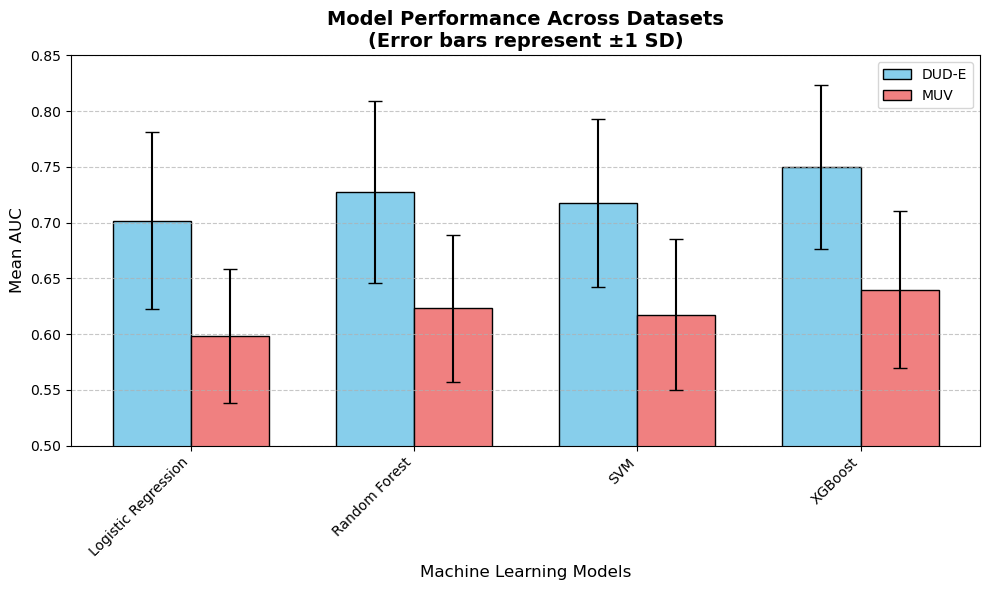

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the provided table
models = ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost']
dude_auc_means = [0.7018, 0.7276, 0.7174, 0.7499]
dude_auc_sd = [0.0792, 0.0816, 0.0753, 0.0737]

muv_auc_means = [0.5982, 0.6231, 0.6176, 0.6398]
muv_auc_sd = [0.0603, 0.0659, 0.0675, 0.0702]

# Set the positions and width for the bars
x_indexes = np.arange(len(models))
bar_width = 0.35

# Create the plot
plt.figure(figsize=(10, 6))

# Plot DUD-E bars and error bars
dude_bars = plt.bar(x_indexes - bar_width/2, dude_auc_means, width=bar_width,
                    label='DUD-E', yerr=dude_auc_sd, capsize=5, color='skyblue', edgecolor='black')

# Plot MUV bars and error bars
muv_bars = plt.bar(x_indexes + bar_width/2, muv_auc_means, width=bar_width,
                   label='MUV', yerr=muv_auc_sd, capsize=5, color='lightcoral', edgecolor='black')

# Add labels, title, and legend
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Mean AUC', fontsize=12)
plt.title('Model Performance Across Datasets\n(Error bars represent ±1 SD)', fontsize=14, fontweight='bold')
plt.xticks(x_indexes, models, rotation=45, ha='right')
plt.legend()


plt.ylim(0.5, 0.85)


plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()

# Show the plot
plt.show()